In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-risk-dataset/loan_default_risk_dataset.csv


In [2]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/loan-default-risk-dataset/loan_default_risk_dataset.csv")
print("shape of the dataset:",df.shape)
df.head()

shape of the dataset: (200, 20)


,Customer_ID,Age,Gender,Marital_Status,Dependents,Education_Level,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Existing_Loans_Count,Property_Ownership,Bank_Account_Balance,Late_Payments,Loan_Purpose,Region,Default_Status
0,CUST0001,52,Male,Married,2,Graduate,Salaried,1144907,418,946996,60,16.19,47.21,0,Mortgaged,988278,0,Personal,Semi-Urban,1
1,CUST0002,55,Female,Single,2,High School,Unemployed,763852,762,759118,120,12.42,55.21,2,Owned,348173,10,Education,Semi-Urban,0
2,CUST0003,35,Male,Married,1,Graduate,Self-Employed,505950,563,1769971,24,8.14,57.49,3,Rented,636130,1,Business,Rural,1
3,CUST0004,62,Female,Divorced,1,Postgraduate,Unemployed,782970,704,1100039,24,17.02,42.38,3,Owned,200301,9,Education,Urban,0
4,CUST0005,64,Female,Divorced,3,Postgraduate,Unemployed,1055187,703,1082754,24,8.02,55.24,5,Owned,876904,0,Business,Rural,0


In [3]:
df.isnull()

,Customer_ID,Age,Gender,Marital_Status,Dependents,Education_Level,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Existing_Loans_Count,Property_Ownership,Bank_Account_Balance,Late_Payments,Loan_Purpose,Region,Default_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.describe()

,Age,Dependents,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Existing_Loans_Count,Bank_Account_Balance,Late_Payments,Default_Status
count,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.130000,1.430000,8.223029e+05,559.695000,9.991049e+05,98.340000,12.799700,35.396000,2.385000,493344.060000,4.810000,0.560000
std,13.269268,1.072779,3.710698e+05,154.506808,5.417493e+05,79.277418,4.283179,14.807807,1.723843,293876.669546,3.232047,0.497633
min,21.000000,0.000000,2.002030e+05,303.000000,5.031700e+04,12.000000,5.030000,10.180000,0.000000,2334.000000,0.000000,0.000000
25%,32.000000,1.000000,4.832580e+05,431.000000,5.652085e+05,24.000000,9.117500,23.215000,1.000000,248001.750000,2.000000,0.000000
50%,44.000000,1.000000,8.344080e+05,537.000000,9.876935e+05,60.000000,12.740000,35.395000,2.000000,477950.000000,5.000000,1.000000
75%,55.000000,2.000000,1.119192e+06,697.000000,1.430278e+06,180.000000,16.522500,48.320000,4.000000,754665.500000,8.000000,1.000000
max,65.000000,3.000000,1.497491e+06,850.000000,1.996205e+06,240.000000,19.960000,59.870000,5.000000,996759.000000,10.000000,1.000000


In [5]:
df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Marital_Status          0
Dependents              0
Education_Level         0
Employment_Status       0
Annual_Income           0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Debt_to_Income_Ratio    0
Existing_Loans_Count    0
Property_Ownership      0
Bank_Account_Balance    0
Late_Payments           0
Loan_Purpose            0
Region                  0
Default_Status          0
dtype: int64

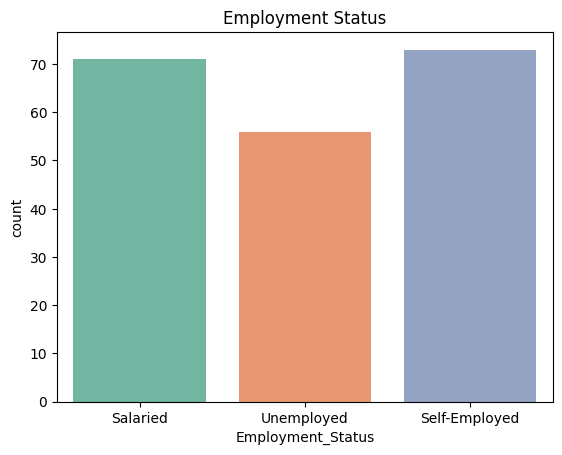

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = sns.color_palette("Set2")
sns.countplot(x="Employment_Status", data=df, palette=custom_palette)
plt.title("Employment Status")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


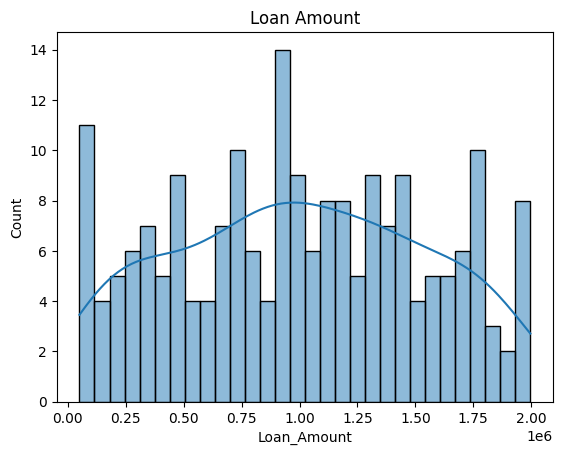

In [7]:
sns.histplot(df["Loan_Amount"], bins=30, kde=True)
plt.title("Loan Amount")
plt.show()



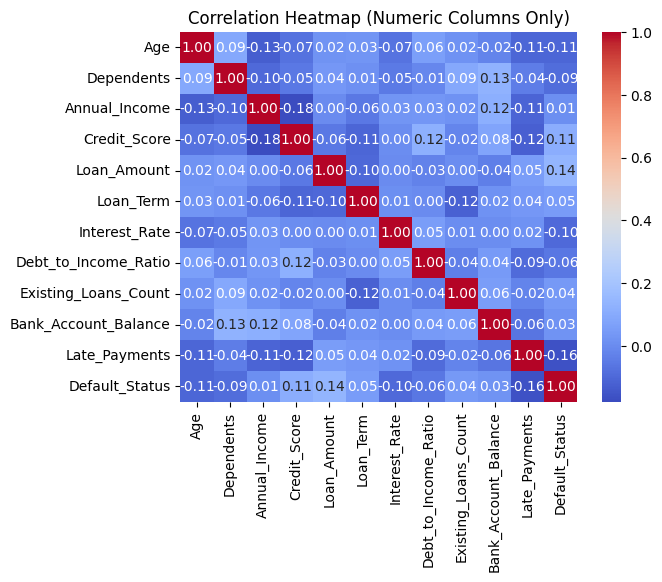

In [8]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

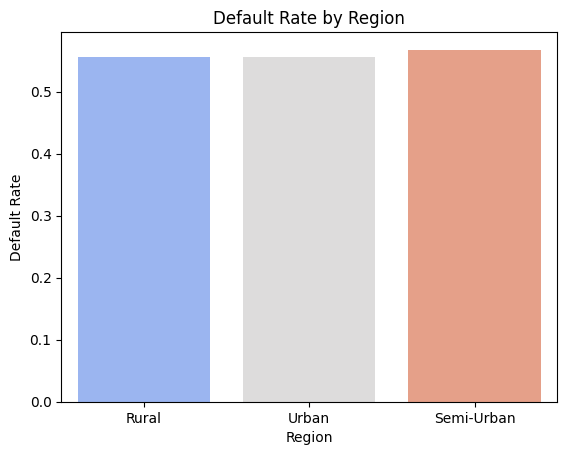

In [9]:
#Feature exploration
#Default Rate by Region
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/loan-default-risk-dataset/loan_default_risk_dataset.csv")
default_by_region = df.groupby("Region")["Default_Status"].mean().sort_values()

sns.barplot(x=default_by_region.index, y=default_by_region.values, palette="coolwarm")
plt.title("Default Rate by Region")
plt.ylabel("Default Rate")
plt.xlabel("Region")
plt.show()

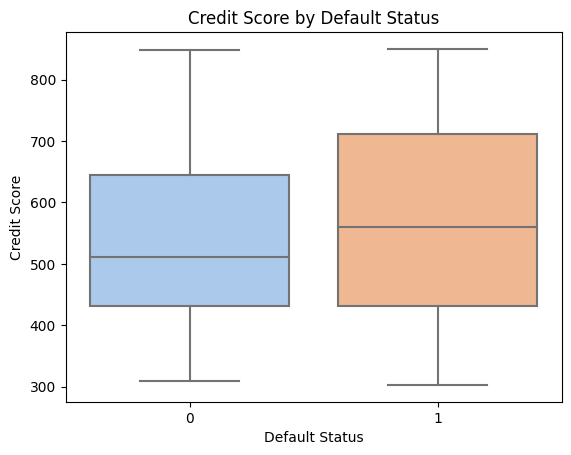

In [10]:
sns.boxplot(x="Default_Status", y="Credit_Score", data=df, palette="pastel")
plt.title("Credit Score by Default Status")
plt.xlabel("Default Status")
plt.ylabel("Credit Score")
plt.show()

In [11]:
# Count unique values in each column
df.nunique().sort_values(ascending=False)

Customer_ID             200
Loan_Amount             200
Bank_Account_Balance    200
Annual_Income           200
Debt_to_Income_Ratio    196
Interest_Rate           187
Credit_Score            173
Age                      44
Late_Payments            11
Loan_Term                 7
Existing_Loans_Count      6
Dependents                4
Loan_Purpose              4
Employment_Status         3
Education_Level           3
Property_Ownership        3
Marital_Status            3
Region                    3
Gender                    2
Default_Status            2
dtype: int64

In [12]:
# Frequency distribution for key categorical columns
df["Employment_Status"].value_counts()
df["Loan_Purpose"].value_counts()
df["Region"].value_counts()

Region
Semi-Urban    74
Rural         72
Urban         54
Name: count, dtype: int64

In [13]:
df.isnull().values.any()


False

In [14]:
# Min and max values for each numeric column
for col in df.select_dtypes(include='number').columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

Age: Min = 21, Max = 65
Dependents: Min = 0, Max = 3
Annual_Income: Min = 200203, Max = 1497491
Credit_Score: Min = 303, Max = 850
Loan_Amount: Min = 50317, Max = 1996205
Loan_Term: Min = 12, Max = 240
Interest_Rate: Min = 5.03, Max = 19.96
Debt_to_Income_Ratio: Min = 10.18, Max = 59.87
Existing_Loans_Count: Min = 0, Max = 5
Bank_Account_Balance: Min = 2334, Max = 996759
Late_Payments: Min = 0, Max = 10
Default_Status: Min = 0, Max = 1


In [15]:
#Feature Type Summary

df.dtypes.value_counts()


int64      10
object      8
float64     2
Name: count, dtype: int64

In [16]:
#Insights:

#1.Unemployed People Default More Often
#2.More Late Payments = Higher Risk
#3.Older Customers Default Less


In [17]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/loan-default-risk-dataset/loan_default_risk_dataset.csv")

df.isnull()

,Customer_ID,Age,Gender,Marital_Status,Dependents,Education_Level,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Existing_Loans_Count,Property_Ownership,Bank_Account_Balance,Late_Payments,Loan_Purpose,Region,Default_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


df_cleaned = df.drop(columns=['Customer_ID'])


categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)


numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('Default_Status')
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


X = df_encoded.drop('Default_Status', axis=1)
y = df_encoded['Default_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(" ROC AUC Score:", roc_auc_score(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 ROC AUC Score: 0.5915178571428572
 Confusion Matrix:
 [[13 15]
 [ 9 23]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.46      0.52        28
           1       0.61      0.72      0.66        32

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.60      0.60      0.59        60



In [19]:

# 1️Import Required Libraries

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report


In [20]:



# XGBoost Model

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print(" XGBoost Results")
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))





 XGBoost Results
ROC-AUC Score: 0.53125
Confusion Matrix:
 [[ 9 19]
 [10 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38        28
           1       0.54      0.69      0.60        32

    accuracy                           0.52        60
   macro avg       0.51      0.50      0.49        60
weighted avg       0.51      0.52      0.50        60



In [21]:

# LightGBM Model

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Metrics
print(" LightGBM Results")
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 80, number of negative: 60
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571429 -> initscore=0.287682
[LightGBM] [Info] Start training from score 0.287682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

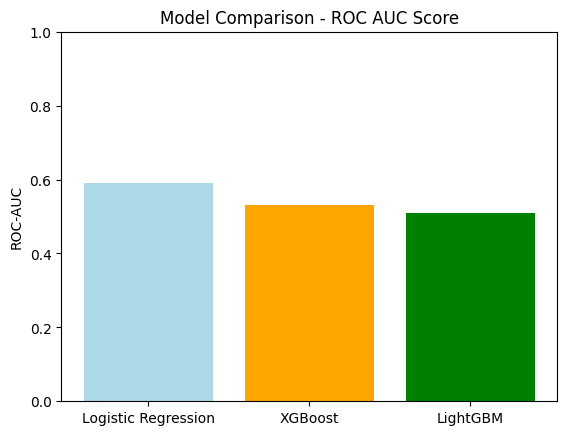

In [22]:
# Compare Model Performances

import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'XGBoost', 'LightGBM']
roc_scores = [
    roc_auc_score(y_test, y_pred),
    roc_auc_score(y_test, y_pred_prob_xgb),
    roc_auc_score(y_test, y_pred_prob_lgb)
]

plt.bar(models, roc_scores, color=['lightblue', 'orange', 'green'])
plt.title('Model Comparison - ROC AUC Score')
plt.ylabel('ROC-AUC')
plt.ylim(0, 1)
plt.show()


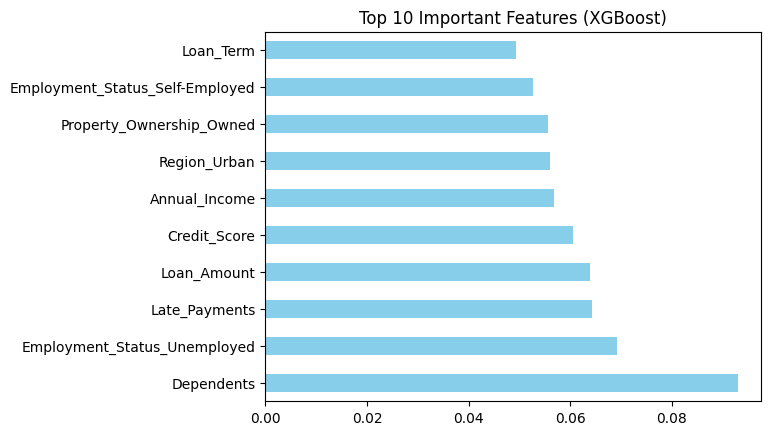

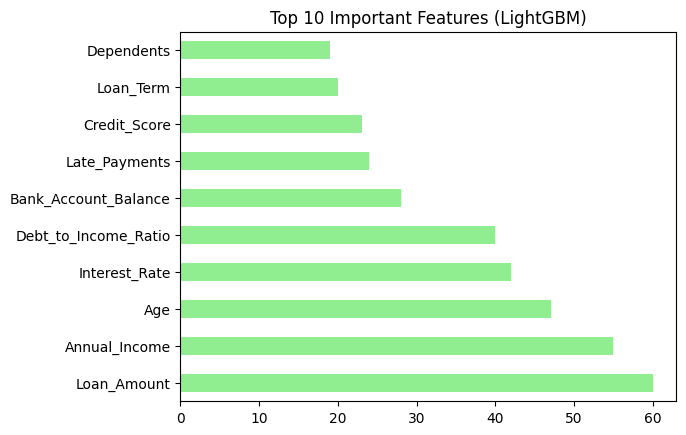

In [23]:

# Feature Importance (Top 10)

import pandas as pd

# XGBoost importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
xgb_importance.plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

# LightGBM importance
lgb_importance = pd.Series(lgb_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
lgb_importance.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Important Features (LightGBM)")
plt.show()


In [24]:
#Tuning Hyperparameter

#Define base model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
from sklearn.model_selection import RandomizedSearchCV

#Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#Run randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

#Use best model
best_model = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [25]:
# Predict probabilities for test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Create a copy of X_test and attach  columns
X_test_copy = X_test.copy()
X_test_copy['risk_score'] = y_pred_prob
X_test_copy['Customer_ID'] = df.loc[X_test_copy.index, 'Customer_ID']
X_test_copy['Loan_Amount'] = df.loc[X_test_copy.index, 'Loan_Amount']
X_test_copy['Credit_Score'] = df.loc[X_test_copy.index, 'Credit_Score']

# Recommend top customers by risk score
top_recommendations = (
    X_test_copy.groupby('Customer_ID')
    .apply(lambda x: x.nlargest(1, 'risk_score'))  # top prediction per customer
    .reset_index(drop=True)
)

# Display columns
print(" Top Recommendations:")
print(top_recommendations[['Customer_ID', 'Loan_Amount', 'Credit_Score', 'risk_score']])

 Top Recommendations:
   Customer_ID  Loan_Amount  Credit_Score  risk_score
0     CUST0006       477232           638    0.035969
1     CUST0010      1494601           817    0.745752
2     CUST0016      1747369           452    0.999256
3     CUST0017      1109017           367    0.150865
4     CUST0019      1607245           511    0.849782
5     CUST0020       719102           403    0.511989
6     CUST0025      1986111           521    0.764835
7     CUST0030       640443           381    0.186456
8     CUST0031      1144028           309    0.889234
9     CUST0039      1396262           528    0.239469
10    CUST0046      1493036           410    0.984836
11    CUST0056      1211051           582    0.532504
12    CUST0057      1678081           481    0.200018
13    CUST0061       974600           372    0.966630
14    CUST0066       503264           700    0.574440
15    CUST0067      1206916           540    0.723502
16    CUST0068      1984226           465    0.193223
17    

/tmp/ipykernel_13/950470364.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1, 'risk_score'))  # top prediction per customer


In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_grid_model = grid_search.best_estimator_

print("✅ Best Parameters (Grid Search):", grid_search.best_params_)
print("✅ Best ROC-AUC (Grid Search):", grid_search.best_score_)

# Evaluate on test set
y_pred_prob_grid = best_grid_model.predict_proba(X_test)[:, 1]
print("Test ROC-AUC (Grid Search):", roc_auc_score(y_test, y_pred_prob_grid))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best Parameters (Grid Search): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
✅ Best ROC-AUC (Grid Search): 0.5510416666666667
Test ROC-AUC (Grid Search): 0.6294642857142858


In [27]:
# Import libraries
import pandas as pd
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Step 1: Rename target column and combine with features
y_train_named = y_train.rename("Approved")
train_df = pd.concat([X_train, y_train_named], axis=1)

# Step 2: Separate majority and minority classes
majority = train_df[train_df['Approved'] == 0]
minority = train_df[train_df['Approved'] == 1]

# Step 3: Upsample minority class
minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

# Step 4: Combine into balanced training set
balanced_df = pd.concat([majority, minority_upsampled])
X_train_balanced = balanced_df.drop('Approved', axis=1)
y_train_balanced = balanced_df['Approved']

# Step 5: Train XGBoost model
model = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)

# Step 6: Evaluate model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("✅ Manual Oversampling + XGBoost Results")
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

✅ Manual Oversampling + XGBoost Results
ROC-AUC Score: 0.5959821428571428
Confusion Matrix:
 [[18 10]
 [17 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.64      0.57        28
           1       0.60      0.47      0.53        32

    accuracy                           0.55        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.56      0.55      0.55        60



In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/loan-default-risk-dataset/loan_default_risk_dataset.csv")

# Create Derived Feature 1: Loan_to_Income_Ratio
df['Loan_to_Income_Ratio'] = df['Loan_Amount'] / df['Annual_Income']

# Create Derived Feature 2: Total_Financial_Burden
df['Total_Financial_Burden'] = df['Debt_to_Income_Ratio'] + (df['Existing_Loans_Count'] * df['Interest_Rate'])

# Display first few rows to verify
print(df[['Loan_Amount', 'Annual_Income', 'Loan_to_Income_Ratio', 'Total_Financial_Burden']].head())


   Loan_Amount  Annual_Income  Loan_to_Income_Ratio  Total_Financial_Burden
0       946996        1144907              0.827138                   47.21
1       759118         763852              0.993802                   80.05
2      1769971         505950              3.498312                   81.91
3      1100039         782970              1.404957                   93.44
4      1082754        1055187              1.026125                   95.34
